In [63]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [74]:
vgg11 = pd.read_csv("../logs/attack_vgg_11.csv")
vgg19 = pd.read_csv("../logs/attack_vgg_19.csv")

vgg11["mode"] = vgg11["mode"].apply(lambda x: str(x))
vgg19["mode"] = vgg19["mode"].apply(lambda x: str(x))

In [77]:
vgg19[ vgg19["mode"]=="train" ]

,mode,epsilon,acc
0,train,0.00,0.902
2,train,0.05,0.238
4,train,0.10,0.175
6,train,0.15,0.147
8,train,0.20,0.133


In [98]:
vgg11_train = vgg11[ vgg11["mode"]=="train" ][["epsilon", "acc"]].set_index("epsilon") * 100
vgg11_test = vgg11[ vgg11["mode"]=="test" ][["epsilon", "acc"]].set_index("epsilon") * 100

vgg19_train = vgg19[ vgg19["mode"]=="train" ][["epsilon", "acc"]].set_index("epsilon") * 100 
vgg19_test = vgg19[ vgg19["mode"]=="test" ][["epsilon", "acc"]].set_index("epsilon") * 100

In [99]:
vgg11_train

,acc
epsilon,
0.00,96.0
0.05,33.1
0.10,22.6
0.15,17.2
0.20,14.0


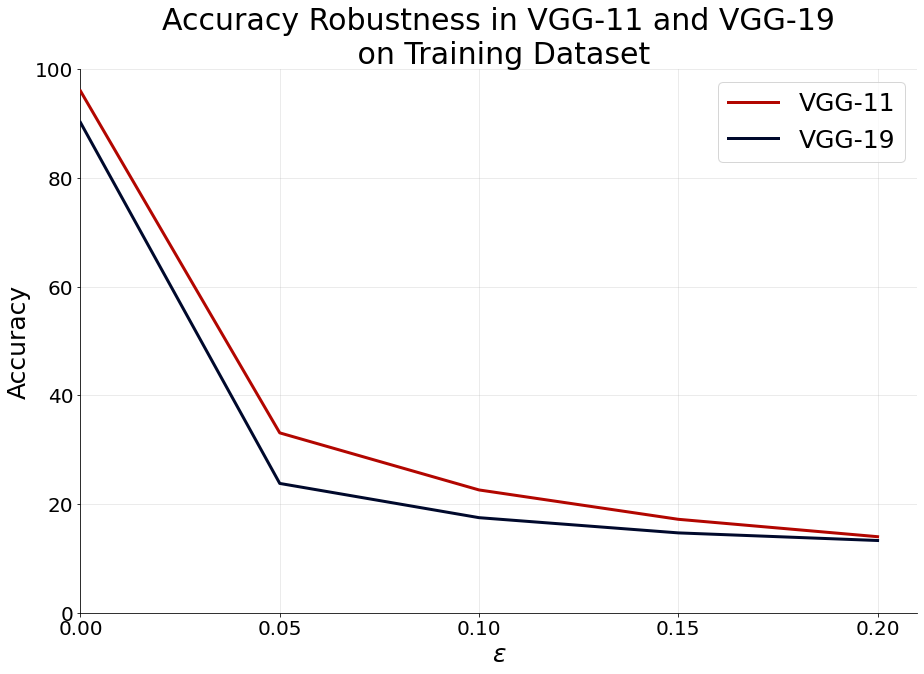

In [119]:
plt.figure(figsize=(15, 10))

ax = plt.gca()

vgg11_train.rename(columns={"acc":"VGG-11"}).plot(linewidth=3, color="#B20600", zorder=5, ax=ax)
vgg19_train.rename(columns={"acc":"VGG-19"}).plot(linewidth=3, color="#00092C", zorder=5, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


plt.xlim([0,0.21])
plt.ylim([0,100])

plt.legend(fontsize=25, loc="best")

plt.xticks(np.arange(0, 0.21, 0.05), fontsize=20)
plt.yticks(np.arange(0, 101, 20), fontsize=20)

plt.xlabel("$\epsilon$", fontsize=25)
plt.ylabel("Accuracy", fontsize=25)

plt.grid(alpha=0.3, zorder=0)

plt.title("Accuracy Robustness in VGG-11 and VGG-19\n on Training Dataset", fontsize=30)

plt.savefig("../plots/fgsm/train_vgg11_vgg19.png")
plt.show()

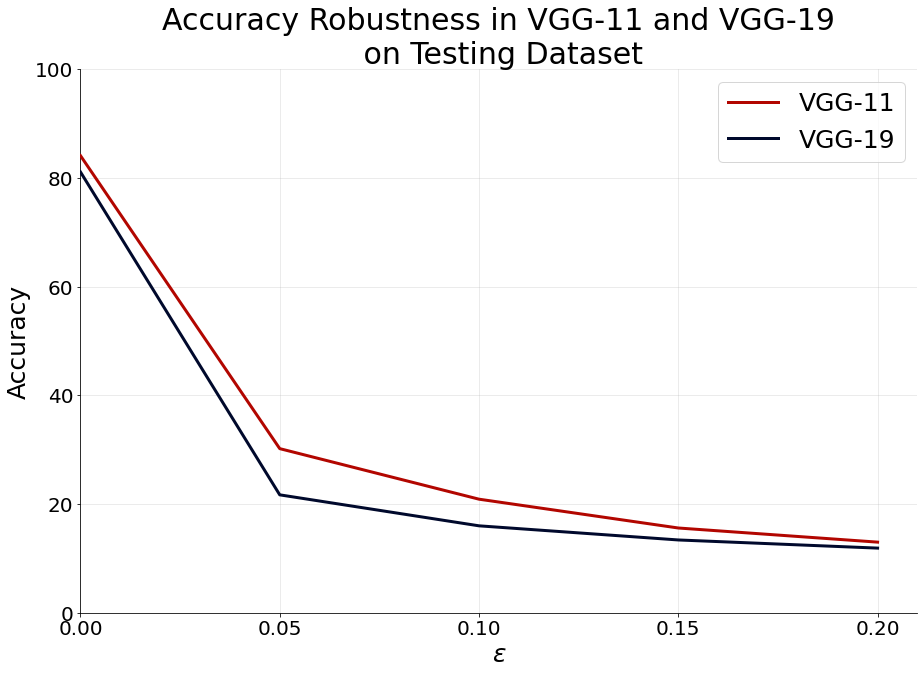

In [114]:
plt.figure(figsize=(15, 10))

ax = plt.gca()

vgg11_test.rename(columns={"acc":"VGG-11"}).plot(linewidth=3, color="#B20600", zorder=5, ax=ax)
vgg19_test.rename(columns={"acc":"VGG-19"}).plot(linewidth=3, color="#00092C", zorder=5, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


plt.xlim([0,0.21])
plt.ylim([0,100])

plt.legend(fontsize=25, loc="best")

plt.xticks(np.arange(0, 0.21, 0.05), fontsize=20)
plt.yticks(np.arange(0, 101, 20), fontsize=20)

plt.xlabel("$\epsilon$", fontsize=25)
plt.ylabel("Accuracy", fontsize=25)

plt.grid(alpha=0.3, zorder=0)

plt.title("Accuracy Robustness in VGG-11 and VGG-19\n on Testing Dataset", fontsize=30)

plt.savefig("../plots/fgsm/test_vgg11_vgg19.png")
plt.show()